DECISION TREE
- Architecture: A decision tree is drawn upside down with its root at the top. Include the internal/root node, based on which the tree splits into branches and leaves

- How it works:
+ usage: make prediction
+ how to split: all the features are considered and different split points are tried and tested using a cost function and the split with the best cost (or lowest cost) is selected
+ when stop: max_depth, min_samples_split, min_samples_leaf,...
+ Bad: sensitive to training set rotation and small variations in the training data


In [132]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

In [247]:
#Read data
red_wine = pd.read_csv('/Users/hoangminhthao/Documents/GitHub/WineQuality/Data set/winequality-red.csv', sep=';')
red_wine_feature = red_wine.drop(columns = ['quality'])
red_wine_label = red_wine['quality']

# Splitting the dataset into training and test set.  
rwf_train, rwf_test, rwl_train, rwl_test = train_test_split(red_wine_feature, red_wine_label, test_size= 0.2, random_state=20)  


In [248]:
#ML without Scaler
wine_tree = DecisionTreeClassifier()
wine_tree.fit(rwf_train,rwl_train)

wine_predict = wine_tree.predict(rwf_test)
cm = metrics.confusion_matrix(rwl_test, wine_predict)
print(cm)
Accuracy = metrics.accuracy_score(rwl_test, wine_predict)
print(Accuracy)

[[ 0  0  0  1  0  0]
 [ 0  0  4  2  1  0]
 [ 1  4 90 31  4  0]
 [ 0  3 36 77 16  4]
 [ 0  2  5 13 24  0]
 [ 0  0  0  2  0  0]]
0.596875


In [252]:
#feature Scaling 
def scaling (data_train, data_test, scaler_name):
    transfer = scaler_name().fit(data_train)
    data_train = transfer.fit_transform(data_train)
    transfer = scaler_name().fit(data_test)
    data_test = transfer.fit_transform(data_test)
    return data_train, data_test

Scaler = [RobustScaler, MinMaxScaler, MaxAbsScaler, StandardScaler, Normalizer]
rwf_train_sca = [0,0,0,0,0]
rwf_test_sca = [1,1,1,1,1]
for i in range (0, 5):
    rwf_train_sca[i], rwf_test_sca[i] = scaling (rwf_train, rwf_test, Scaler[i])

'''
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
'''

'\nst_x= StandardScaler()    \nx_train= st_x.fit_transform(x_train)    \nx_test= st_x.transform(x_test)  \n'

In [253]:
#ML with Scaler
wine_tree = DecisionTreeClassifier()
wine_tree.fit(rwf_train_sca[1],rwl_train)
wine_predict = wine_tree.predict(rwf_test_sca[1])

#Evaluate
Accuracy = metrics.accuracy_score(rwl_test, wine_predict)
Balanced_accuracy = metrics.balanced_accuracy_score(rwl_test, wine_predict)
print(Accuracy, Balanced_accuracy)

'''
Precision = metrics.precision_score(rwl_test, wine_predict)
Recall = metrics.recall_score(rwl_test, wine_predict)
F1_score = metrics.f1_score(rwl_test, wine_predict)
print(Precision, Recall, F1_score)
'''

0.4625 0.22968428630193335


'\nPrecision = metrics.precision_score(rwl_test, wine_predict)\nRecall = metrics.recall_score(rwl_test, wine_predict)\nF1_score = metrics.f1_score(rwl_test, wine_predict)\nprint(Precision, Recall, F1_score)\n'

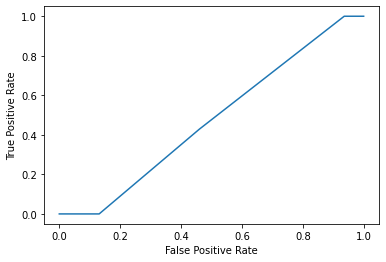

In [254]:
#ROC and AUC
fpr, tpr, _ = roc_curve(rwl_test, wine_predict, pos_label=wine_tree.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()